<table align="center">
   <td align="center"><a target="_blank" href="https://colab.research.google.com/github/umbcdata602/fall2020/blob/master/lab_geometry_of_w.ipynb">
<img src="http://introtodeeplearning.com/images/colab/colab.png?v2.0"  style="padding-bottom:5px;" />Run in Google Colab</a></td>
</table>


# Lab: Geometry of w

Some linear algebra review that's relevant to machine learning.

### Net input function

Recall Raschka's diagram for the Perceptron learning algorithm:

<img src="https://github.com/rasbt/python-machine-learning-book-3rd-edition/raw/master/ch02/images/02_04.png" width="600"/>

The "net input" function is:

$$
z = w_0 + \sum_{i=1}^p w_i x_i = w_0 + \mathbf{w}^T \mathbf{x}
$$

To keep things simple, the examples below involve $p=2$ dimensions,
so the net input function simplifies to:

$$
z = w_0 + w_1 x_1 + w_2 x_2
$$

The weight $w_0$ is often called the "bias unit".

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create random weights $w_i$

This is how weights are initialized in `Perceptron`, `AdalineGD`, `AdalineSGD` and `LogisticRegressionGD`.


Ref: [numpy.random quickstart](https://numpy.org/devdocs/reference/random/index.html)

In [ ]:
# Initialize the random number generator
# Raschka's code uses the following approach, which is deprecated.
# This is how it should be done with latest version numpy.
rgen = np.random.default_rng(42)

In [ ]:
# Generate a set of random weights
weights = rgen.normal(loc=0.0, scale=1, size=3)

# Isolate the bias unit, w0
w0 = weights[0]

# Create an array for w1 and w2
w = weights[1:]

print("The bias unit = w0 =", w0)
print("The weight vector w = [w1, w2] =", w)

The bias unit = w0 = 0.30471707975443135
The weight vector w = [w1, w2] = [-1.03998411  0.7504512 ]


# $z=w_0$

When $z=w_0$, the net input function reduces to

$$\mathbf{w}^T \mathbf{x} = 0$$

You can write this using dot notation

$$\mathbf{w} \cdot \mathbf{x} = 0$$

This is the mathematical statement that $\mathbf{w}$ and $\mathbf{x}$ are orthogonal.

Note: the concepts of orthogonality and sample covariance are related. If you have standardized $\mathbf{x}_i$ and $\mathbf{x}_j$,then the following relation is a statement that their sample covariance is zero:

$$
\mathbf{x}_i \cdot \mathbf{x}_j = 0 \ \ \mathrm{for} \ \ i \neq j
$$

# $z=0$

When $z=0$, the net input function defines the decision boundary:

$$
0 = w_0 + \mathbf{w}^T \mathbf{x}
$$

In $p=2$ dimensions, this is a line:

$$
0 = w_0 + w_1 x_1 + w_2 x_2
$$

The weights $w_0$ and $\mathbf{w}$ are constants, and $\mathbf{x}$ are the independent variables.

In [ ]:
# This cell defines a convenience function for plotting a line.
# The horizontal and vertical coordinates (independent variables) are x1 and x2.

# Generate the coordinates x1 and x2
x1 = np.linspace(-1, 1, 10)
x2 = np.linspace(-1, 1, 10)

# Use np.stack() to organize the coordinates with indices: [sample, feature]
# This implements a standard coordinate convention.
# We'll see it used repeatedly in scikit-learn and tensorflow. 
X = np.stack((x1, x2), axis=1)

# Verify the shape of X
n_samples = len(x1)
n_features = 2 # we're using feature coordinates x1 & x2
assert X.shape == (n_samples, n_features)

def plot_line(x, y, label=None):
  # Generate the coordinates x1 and x2
  x1 = np.linspace(-1, 1, 10)
  x2 = np.linspace(-1, 1, 10)

  # Use np.stack() to organize the coordinates 
  # This is the machine-learning convention: [sample, feature]
  X = np.stack((x1, x2), axis=1)
  print("X.shape:", X.shape)

  # Set up the plot
  fig, axes = plt.subplots()
  axes.set_aspect("equal")
  axes.set_xlim(-1,1)
  axes.set_ylim(-1,1)
  axes.set_xticks([-1, -.5, 0, .5, 1])
  axes.set_yticks([-1, -.5, 0, .5, 1])

  # Add a grid with the axes
  axes.grid()
  axes.plot(X[:,0], 0 * X[:,1], 'k')
  axes.plot(0 * X[:,0], X[:,1], 'k')

  # Plot the line
  axes.plot(x, y, label=label)

  # Return the axes in case we want to plot more stuff
  return axes

# Geometric interpretation of $z=0$, $\mathbf{w}$ and $w_0$

* If $z=w_0$, then $x_2 = - \frac{w_1}{w_2} x_1 $ is a line passing through the origin.
* $\mathbf{w}$ is perpendicular (orthogonal) the line $z=w_0$.
* For any point $\mathbf{x}$ on the line $z=0$, the projection $\mathbf{w} \cdot \mathbf{x}$ has the directed length $w_0$.
* If $\mathbf{w}$ were a unit vector, then $w_0$ would be the distance from $\mathbf{x}$ to the origin along $\mathbf{w}$.
* The shortest distance between the line $z=0$ and the origin $[0,0]$ is $w_0 / ||\mathbf{w}||$.

Verify the length of wp: 1.000
Shortest distance to the origin: -0.401
Verify distance to origin for k=0: -0.401
Verify distance to origin for k=1: -0.401
Verify distance to origin for k=2: -0.401
Verify distance to origin for k=3: -0.401
Verify distance to origin for k=4: -0.401
Verify distance to origin for k=5: -0.401
Verify distance to origin for k=6: -0.401
Verify distance to origin for k=7: -0.401
Verify distance to origin for k=8: -0.401
Verify distance to origin for k=9: -0.401
X.shape: (10, 2)


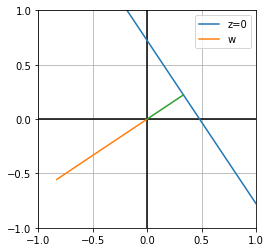

In [ ]:
# Create coordinate arrays for the line z=0
x1 = X[:,0]
x2 = - (w0 + w[0] * x1) / w[1]

# Normalize the weight vector [w_1, w_2] so it has length = 1
w_norm = np.dot(w, w)**(1/2)
w = w / w_norm

# Use a dot product to verify that the normalized weight vector has length = 1
print("Verify the length of wp: {:.3f}".format( np.dot(w, w) ))

# Compute the distance to the origin from the weights
distance = - w0 / w_norm
print("Shortest distance to the origin: {:.3f}".format( distance ))

# Use a dot product to get the distance from the line $z=0$ the origin along [w1, w2]
for k in range(len(x1)):
  x = np.array([x1[k], x2[k]])
  print("Verify distance to origin for k={}: {:.3f}".format( k, np.dot(w, x) ))

# Plot the line z=0
axes = plot_line(x1, x2, label='z=0')

# Add the unit vector w to the plot
w1 = [0, w[0]]
w2 = [0, w[1]]
axes.plot(w1, w2, label='w')

plt.legend();

The next cell creates a new set of random weights $w_0$ and $\mathbf{w}$.

Plot them by re-running the cell above.

In [ ]:
# Generate a new set of weights
weights = rgen.normal(loc=0.0, scale=1, size=3)

# Isolate the bias unit, w0
w0 = weights[0]

# Create an array for w1 and w2
w = weights[1:]